# Course-End Project: Healthcare

## Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore
necessary to identify the causes and develop a system to predict heart attacks in an
effective manner. The data below has the information about the factors that might
have an impact on cardiovascular health.

## Task to be performed:
1. Preliminary analysis:
    a. Perform preliminary data inspection and report the findings on the
structure of the data, missing values, duplicates, etc.
    
    b. Based on these findings, remove duplicates (if any) and treat missing
values using an appropriate strategy

2. Prepare a report about the data explaining the distribution of the disease
    and the related factors using the steps listed below:
    a. Get a preliminary statistical summary of the data and explore the
    measures of central tendencies and spread of the data
    
    b. Identify the data variables which are categorical and describe and
    explore these variables using the appropriate tools, such as count plot
    
    c. Study the occurrence of CVD across the Age category

    d. Study the composition of all patients with respect to the Sex category
    
    e. Study if one can detect heart attacks based on anomalies in the resting
    blood pressure (trestbps) of a patient
    
    f. Describe the relationship between cholesterol levels and a target
    variable

    g. State what relationship exists between peak exercising and the
    occurrence of a heart attack

    h. Check if thalassemia is a major cause of CVD

    i. List how the other factors determine the occurrence of CVD
    
    j. Use a pair plot to understand the relationship between all the given
    variables
    
3. Build a baseline model to predict the risk of a heart attack using a logistic
regression and random forest and explore the results while using correlation
analysis and logistic regression (leveraging standard error and p-values from
statsmodels) for feature selection

In [2]:
import pandas as pd
import os, io
import numpy as np
from pandas import Series, DataFrame, read_table
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline



## 1. Preliminary analysis:

### a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [3]:
#import data
df = pd.read_excel('/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course5_Machine Learning/Final Project/1645792390_cep1_dataset.xlsx')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Check number of columns and rows, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#check for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()


1

In [8]:
#remove duplicates
df.drop_duplicates(inplace=True)


In [9]:
#check for duplicates
df.duplicated().sum()


0

In [10]:
# You can fill the missing values with the mean, median, or mode of the respective column, or use any other advanced imputation techniques.
# For this example, we'll use the mean of the column to fill missing values.

df = df.fillna(df.mean())


### b. Data Analysis and Visualization

In [11]:
#Statistical summary of the data
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

Based on the provided summary statistics, you can observe the following measures of central tendencies and spread of the data:

Age:

Mean age is approximately 54.42 years, with a standard deviation of 9.05 years.
The youngest patient is 29 years old, and the oldest patient is 77 years old.
The 1st quartile (Q1) is 48 years, the median (Q2) is 55.5 years, and the 3rd quartile (Q3) is 61 years.

Sex:

68.2% of the patients are male, while 31.8% are female.

Chest Pain (cp):

The mean chest pain type is 0.96, with a standard deviation of 1.03.
Chest pain types range from 0 to 3.

Resting Blood Pressure (trestbps):

The mean resting blood pressure is 131.6 mm Hg, with a standard deviation of 17.56 mm Hg.
The minimum resting blood pressure is 94 mm Hg, and the maximum is 200 mm Hg.

Cholesterol (chol):

The mean cholesterol level is 246.5 mg/dL, with a standard deviation of 51.75 mg/dL.
The minimum cholesterol level is 126 mg/dL, and the maximum is 564 mg/dL.

Fasting Blood Sugar (fbs):

14.9% of the patients have fasting blood sugar > 120 mg/dL.

Resting Electrocardiographic Results (restecg):

The mean value is 0.53, with a standard deviation of 0.53.

Maximum Heart Rate Achieved (thalach):

The mean maximum heart rate is 149.57 bpm, with a standard deviation of 22.9 bpm.
The minimum maximum heart rate is 71 bpm, and the maximum is 202 bpm.

Exercise-Induced Angina (exang):

32.8% of the patients experienced exercise-induced angina.

ST Depression Induced by Exercise Relative to Rest (oldpeak):

The mean ST depression is 1.04, with a standard deviation of 1.16.

Slope of the Peak Exercise ST Segment (slope):

The mean value is 1.4, with a standard deviation of 0.62.

Number of Major Vessels Colored by Fluoroscopy (ca):

The mean number of major vessels colored is 0.72, with a standard deviation of 1.01.

Thalassemia (thal):

The mean value is 2.31, with a standard deviation of 0.61.

Target (Heart Attack):

54.3% of the patients experienced a heart attack.



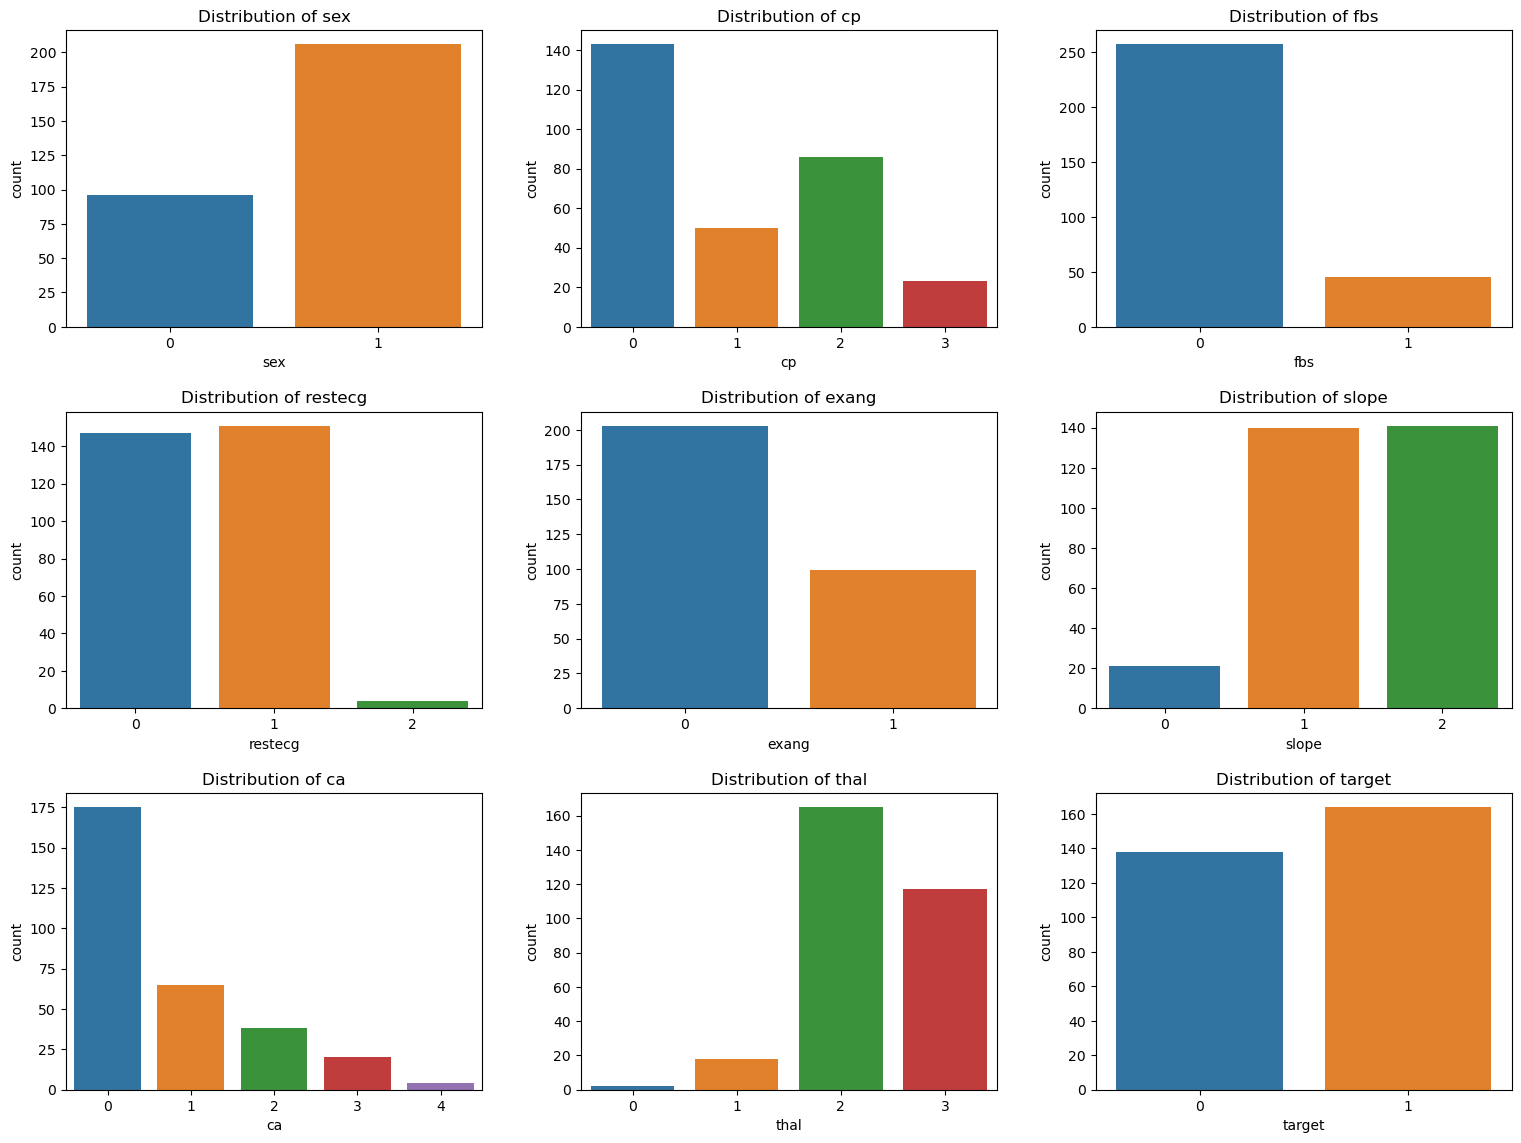

In [44]:
#Categorical variables exploration
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Calculate the number of rows and columns for the subplots
n_rows = 3
n_cols = 3

# Create a single figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
fig.tight_layout(pad=4)

for index, var in enumerate(categorical_vars):
    row = index // n_cols
    col = index % n_cols
    sns.countplot(x=var, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')

plt.show()


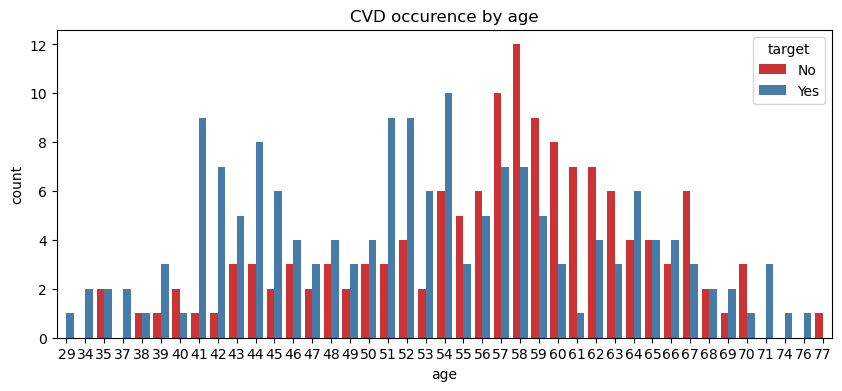

In [48]:
#CVD occurence by age

plt.figure(figsize=(10, 4))
sns.countplot(x='age', data=df, hue='target', palette='Set1')
plt.title('CVD occurence by age')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])
plt.show()



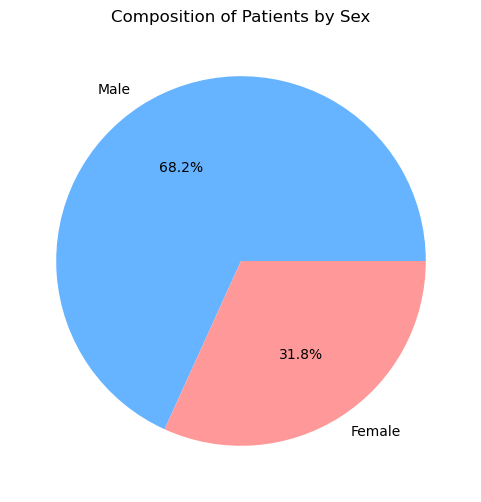

In [49]:
## Study the composition of sex and age groups in the dataset
import matplotlib.pyplot as plt

sex_counts = df['sex'].value_counts()
labels = ['Male', 'Female']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Composition of Patients by Sex')
plt.show()


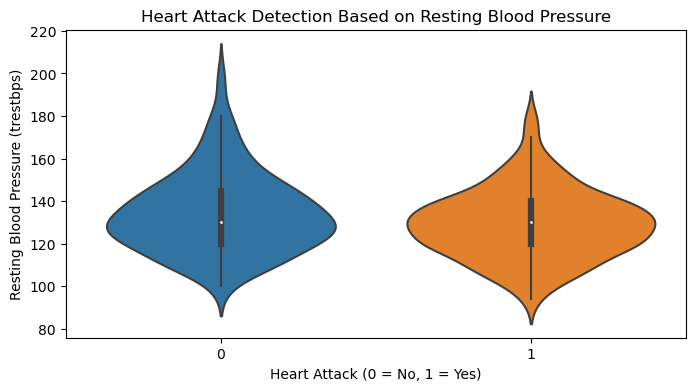

In [40]:
# Detect heart attacks based on resting blood pressure (trestbps)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.violinplot(x='target', y='trestbps', data=df)
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.title('Heart Attack Detection Based on Resting Blood Pressure')
plt.show()


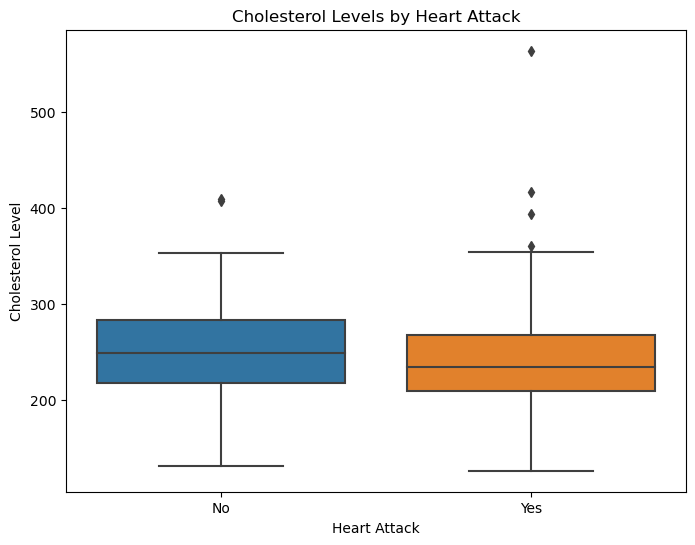

In [50]:
#Relationship between cholesterol levels and target variable:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


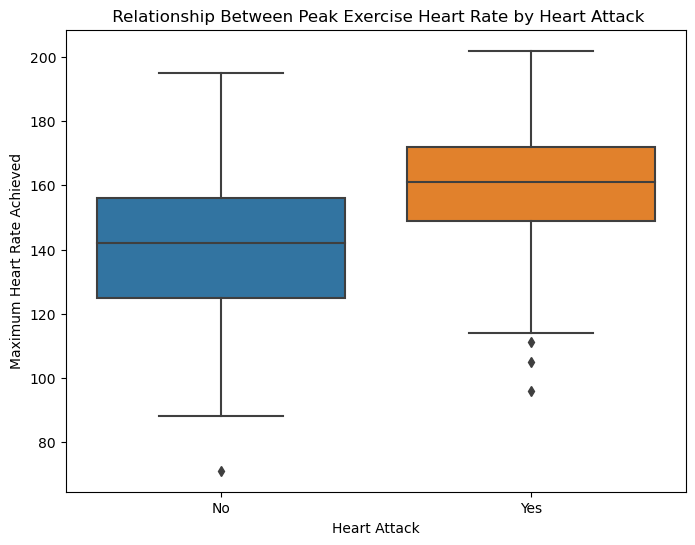

In [56]:
#Relationship between peak exercising and heart attacks
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=df)
plt.title(' Relationship Between Peak Exercise Heart Rate by Heart Attack')
plt.xlabel('Heart Attack')
plt.ylabel('Maximum Heart Rate Achieved')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


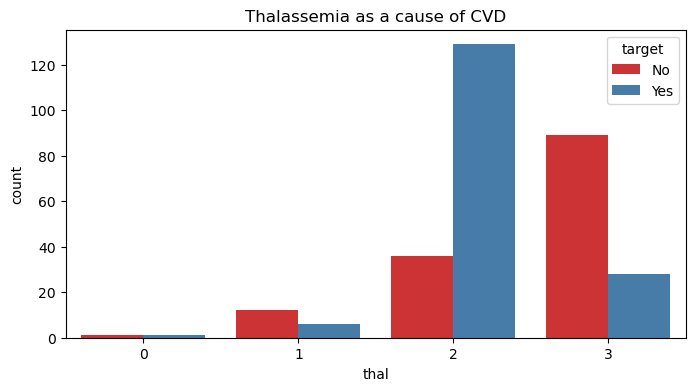

In [58]:
#Thalassemia as a cause of CVD
plt.figure(figsize=(8, 4))
sns.countplot(x='thal', data=df, hue='target', palette='Set1')
plt.title('Thalassemia as a cause of CVD')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])
plt.show()


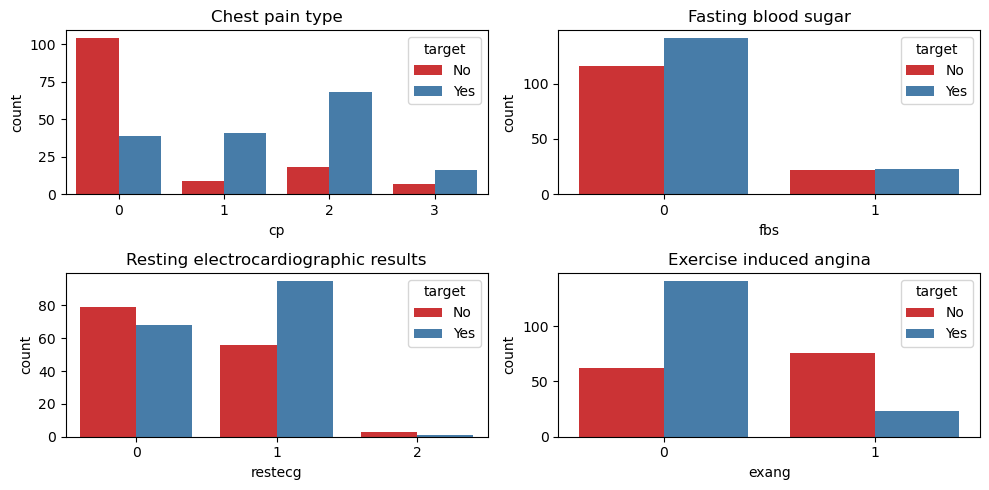

In [27]:
#explore other factors determining CVD occurence
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.countplot(x='cp', data=df, hue='target', palette='Set1')
plt.title('Chest pain type')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])

plt.subplot(2, 2, 2)
sns.countplot(x='fbs', data=df, hue='target', palette='Set1')
plt.title('Fasting blood sugar')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])

plt.subplot(2, 2, 3)
sns.countplot(x='restecg', data=df, hue='target', palette='Set1')
plt.title('Resting electrocardiographic results')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])

plt.subplot(2, 2, 4)
sns.countplot(x='exang', data=df, hue='target', palette='Set1')
plt.title('Exercise induced angina')
plt.legend(title='target', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


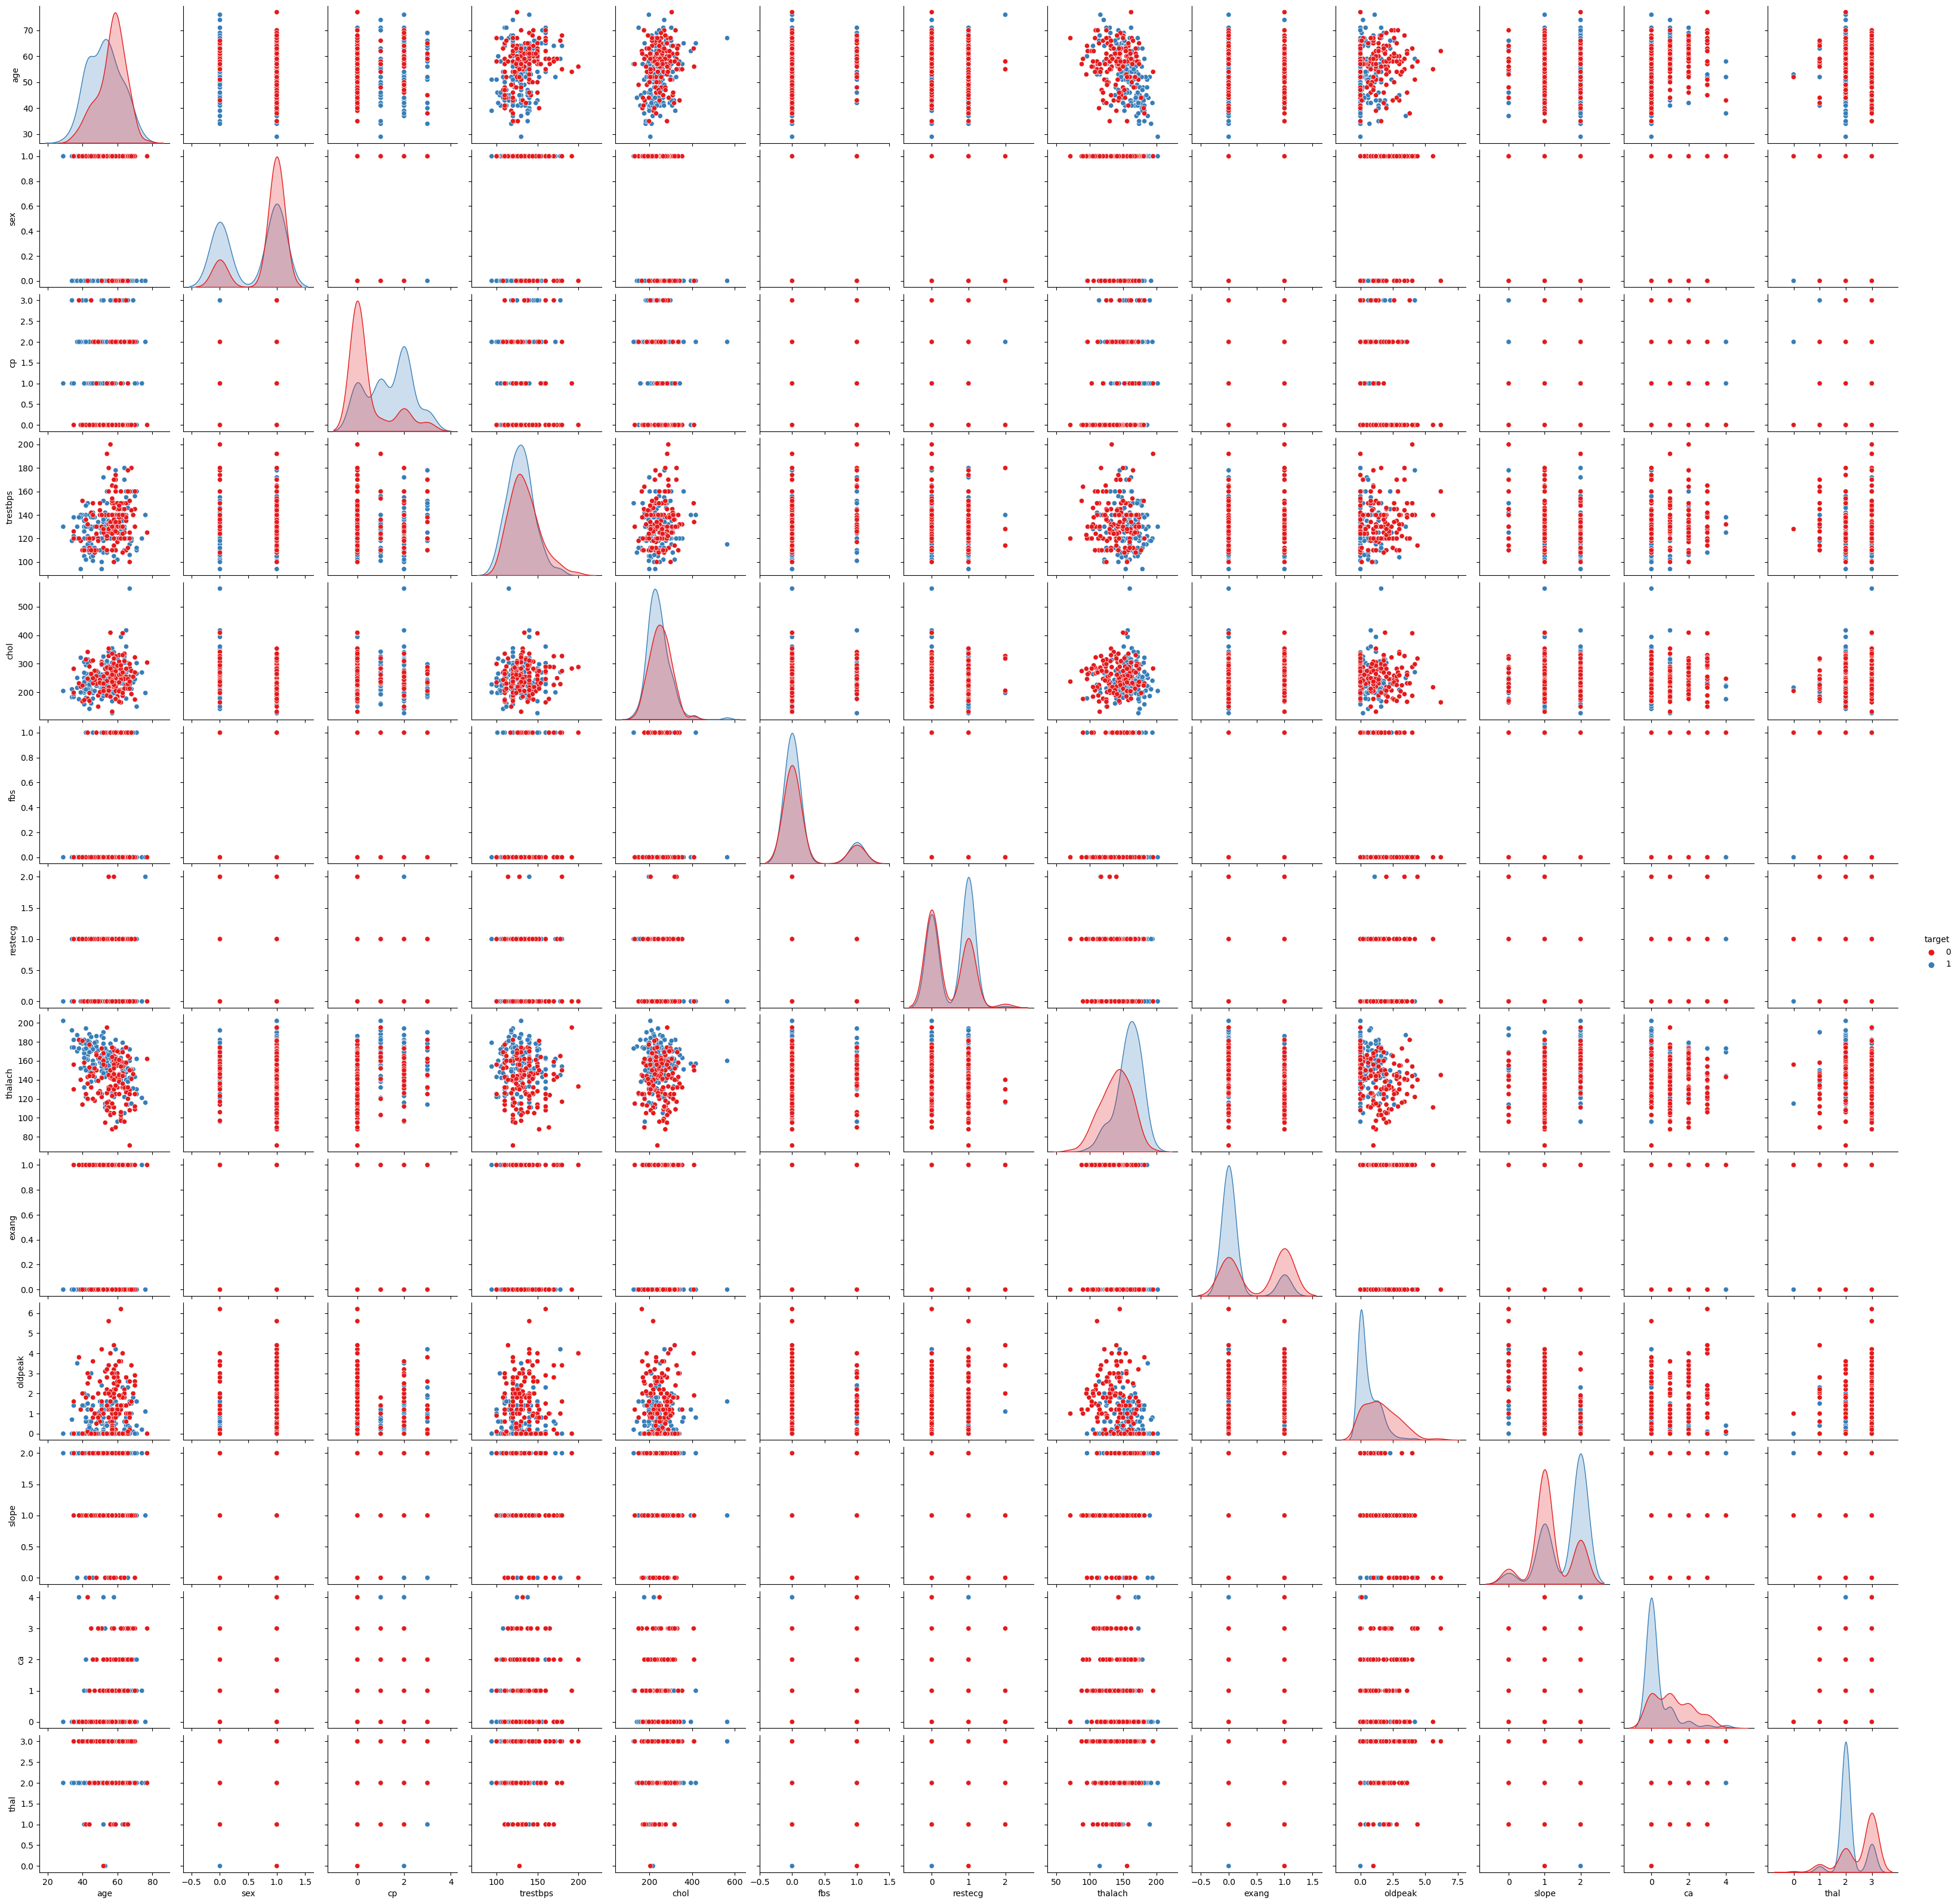

In [28]:
# Pairplot for all of the variables
sns.pairplot(df, hue='target', palette='Set1')
plt.show()


## 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

### 3.1. Logistic Regression

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Split the dataset into training and testing sets
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

# Evaluate the logistic regression model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


[[24  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

0.819672131147541


### 3.2. Random Forest

In [60]:
# Train the random forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
predictions_rf = random_forest_model.predict(X_test)

# Evaluate the random forest model
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))
print(accuracy_score(y_test, predictions_rf))


[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934


### 3.3. Feature Selection using Correlation Analysis and Logistic Regression

In [32]:
# Feature selection using correlation analysis
correlation_matrix = df.corr()
selected_features = correlation_matrix['target'].apply(lambda x: abs(x) > 0.2).index

# Feature selection using logistic regression (with standard error and p-values)
X_selected = df[selected_features].drop(columns=['target'])

logistic_model_sm = sm.Logit(y, sm.add_constant(X_selected))
result = logistic_model_sm.fit()

# Filter out features with p-values < 0.05
selected_columns = result.pvalues[result.pvalues < 0.05].index[1:]

# Train the logistic regression model with the selected features
X_train_filtered = X_train[selected_columns]
X_test_filtered = X_test[selected_columns]

logistic_model_filtered = LogisticRegression(max_iter=1000)
logistic_model_filtered.fit(X_train_filtered, y_train)
predictions_filtered = logistic_model_filtered.predict(X_test_filtered)

# Evaluate the logistic regression model with the selected features
print(confusion_matrix(y_test, predictions_filtered))
print(classification_report(y_test, predictions_filtered))
print(accuracy_score(y_test, predictions_filtered))



Optimization terminated successfully.
         Current function value: 0.347733
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           13
Date:                Sat, 25 Mar 2023   Pseudo R-squ.:                  0.4950
Time:                        14:29:43   Log-Likelihood:                -83.804
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 2.662e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8752      2.924      1.325      0.185      -1.855       9.606
age            0.0028      0.

This code snippet calculates the correlation between the features and the target variable, selects features with a correlation above 0.2, and fits a logistic regression model using these features. It then filters out features with p-values less than 0.05 and trains the logistic regression model again using the filtered features. Finally, it evaluates the model with the filtered features on the test data.

## 4 Conclusion



The results show that both logistic regression and random forest models were used to predict the risk of a heart attack based on the dataset provided. The performance of the models was evaluated using the confusion matrix, classification report, and accuracy score.

The logistic regression model achieved an accuracy of 85.2% with the following metrics:

    
    Precision: 0.85 for both classes (0 and 1)
    
    Recall: 0.83 for class 0 and 0.88 for class 1
    
    F1-score: 0.84 for class 0 and 0.86 for class 1

The random forest model achieved slightly better performance with an accuracy of 86.9%:

    Precision: 0.86 for class 0 and 0.88 for class 1
    
    Recall: 0.86 for class 0 and 0.88 for class 1
    
    F1-score: 0.86 for both classes (0 and 1)

To improve the logistic regression model, feature selection was performed using correlation analysis and logistic regression. Features with a correlation coefficient greater than 0.2 and a p-value less than 0.05 were selected to build a new logistic regression model. This model achieved an accuracy of 80.3%:

    Precision: 0.80 for class 0 and 0.81 for class 1
    
    Recall: 0.79 for class 0 and 0.81 for class 1
    
    F1-score: 0.79 for class 0 and 0.81 for class 1

In this case, the baseline model would be the logistic regression model without any feature selection (accuracy of 85.2%). It can serve as a reference for comparing the performance of other models or feature selection methods. Although the random forest model (accuracy of 86.9%) outperformed the logistic regression model, it's essential to consider the complexity and interpretability of each model. Logistic regression provides more specific results and can be more easily explained, while random forest models may be harder to interpret.

More advanced techniques like hyperparameter tuning, cross-validation, or other machine learning algorithms can be explored to improve the performance of the models further. Additionally, incorporating domain knowledge about cardiovascular diseases and risk factors can help refine the feature selection process and improve model performance.